In [2]:
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [3]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [4]:
import pandas as pd
train_images_flat = train_images.reshape(train_images.shape[0], -1)
train_labels_flat = train_labels.reshape(train_labels.shape[0], -1)

# Combine flattened image arrays and labels into a DataFrame
df_train= pd.DataFrame(train_images_flat, columns=[f"pixel_{i}" for i in range(train_images_flat.shape[1])])
df_train['label'] = train_labels_flat

# Display the DataFrame
df_train

pixel_0   pixel_1   pixel_2   pixel_3   pixel_4   pixel_5   pixel_6  \
0      0.231373  0.243137  0.247059  0.168627  0.180392  0.176471  0.196078   
1      0.603922  0.694118  0.733333  0.494118  0.537255  0.533333  0.411765   
2      1.000000  1.000000  1.000000  0.992157  0.992157  0.992157  0.992157   
3      0.109804  0.098039  0.039216  0.145098  0.133333  0.074510  0.149020   
4      0.666667  0.705882  0.776471  0.658824  0.698039  0.768627  0.694118   
...         ...       ...       ...       ...       ...       ...       ...   
49995  0.568627  0.631373  0.760784  0.592157  0.650980  0.780392  0.611765   
49996  1.000000  0.960784  0.517647  0.996078  0.968627  0.525490  1.000000   
49997  0.137255  0.698039  0.921569  0.156863  0.690196  0.937255  0.164706   
49998  0.741176  0.827451  0.941176  0.729412  0.815686  0.925490  0.725490   
49999  0.898039  0.898039  0.937255  0.925490  0.929412  0.968627  0.917647   

        pixel_7   pixel_8   pixel_9  ...  pixel_3063  pixel_3064  pixel_3065  \
0      0.188235  0.168627  0.266667  ...    0.847059    0.721569    0.549020   
1      0.407843  0.372549  0.400000  ...    0.560784    0.521569    0.545098   
2      0.992157  0.992157  0.992157  ...    0.305882    0.333333    0.325490   
3      0.137255  0.078431  0.164706  ...    0.211765    0.184314    0.109804   
4      0.725490  0.796078  0.717647  ...    0.294118    0.309804    0.321569   
...         ...       ...       ...  ...         ...         ...         ...   
49995  0.670588  0.803922  0.607843  ...    0.152941    0.160784    0.219608   
49996  0.976471  0.537255  0.996078  ...    0.976471    0.682353    0.309804   
49997  0.690196  0.945098  0.152941  ...    0.105882    0.203922    0.301961   
49998  0.811765  0.921569  0.721569  ...    0.764706    0.721569    0.662745   
49999  0.925490  0.968627  0.905882  ...    0.701961    0.694118    0.678431   

       pixel_3066  pixel_3067  pixel_3068  pixel_3069  pixel_3070  pixel_3071  \
0        0.592157    0.462745    0.329412    0.482353    0.360784    0.282353   
1        0.560784    0.525490    0.556863    0.560784    0.521569    0.564706   
2        0.309804    0.333333    0.325490    0.313726    0.337255    0.329412   
3        0.247059    0.219608    0.145098    0.282353    0.254902    0.180392   
4        0.278431    0.294118    0.305882    0.286275    0.301961    0.313726   
...           ...         ...         ...         ...         ...         ...   
49995    0.141176    0.149020    0.207843    0.145098    0.152941    0.211765   
49996    0.988235    0.709804    0.317647    0.992157    0.709804    0.298039   
49997    0.082353    0.168627    0.258824    0.047059    0.121569    0.196078   
49998    0.768627    0.741176    0.670588    0.764706    0.745098    0.670588   
49999    0.643137    0.643137    0.635294    0.639216    0.639216    0.631373   

       label  
0          6  
1          9  
2          9  
3          4  
4          1  
...      ...  
49995      2  
49996      6  
49997      9  
49998      1  
49999      1  

[50000 rows x 3073 columns]

In [5]:
test_images_flat = test_images.reshape(test_images.shape[0], -1)
test_labels_flat = test_labels.reshape(test_labels.shape[0], -1)

# Combine flattened image arrays and labels into a DataFrame
df_test= pd.DataFrame(test_images_flat, columns=[f"pixel_{i}" for i in range(test_images_flat.shape[1])])
df_test['label'] =test_labels_flat

# Display the DataFrame
df_test

pixel_0   pixel_1   pixel_2   pixel_3   pixel_4   pixel_5   pixel_6  \
0     0.619608  0.439216  0.192157  0.623529  0.435294  0.184314  0.647059   
1     0.921569  0.921569  0.921569  0.905882  0.905882  0.905882  0.909804   
2     0.619608  0.745098  0.870588  0.619608  0.733333  0.854902  0.545098   
3     0.607843  0.611765  0.584314  0.654902  0.690196  0.733333  0.690196   
4     0.254902  0.266667  0.196078  0.274510  0.317647  0.250980  0.188235   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.298039  0.305882  0.521569  0.298039  0.305882  0.525490  0.301961   
9996  0.317647  0.223529  0.168627  0.356863  0.270588  0.207843  0.384314   
9997  0.078431  0.058824  0.047059  0.074510  0.054902  0.043137  0.058824   
9998  0.098039  0.156863  0.047059  0.058824  0.141176  0.011765  0.090196   
9999  0.286275  0.305882  0.294118  0.384314  0.403922  0.443137  0.388235   

       pixel_7   pixel_8   pixel_9  ...  pixel_3063  pixel_3064  pixel_3065  \
0     0.454902  0.200000  0.650980  ...    0.094118    0.301961    0.486275   
1     0.909804  0.909804  0.909804  ...    0.658824    0.717647    0.698039   
2     0.650980  0.760784  0.517647  ...    0.019608    0.023529    0.031373   
3     0.701961  0.756863  0.745098  ...    0.235294    0.247059    0.196078   
4     0.250980  0.180392  0.117647  ...    0.560784    0.701961    0.533333   
...        ...       ...       ...  ...         ...         ...         ...   
9995  0.313726  0.517647  0.298039  ...    0.800000    0.858824    0.925490   
9996  0.294118  0.247059  0.415686  ...    0.607843    0.545098    0.505882   
9997  0.054902  0.043137  0.058824  ...    0.094118    0.090196    0.196078   
9998  0.160784  0.070588  0.066667  ...    0.364706    0.486275    0.313726   
9999  0.415686  0.447059  0.301961  ...    0.454902    0.450980    0.368627   

      pixel_3066  pixel_3067  pixel_3068  pixel_3069  pixel_3070  pixel_3071  \
0       0.133333    0.329412    0.505882    0.082353    0.262745    0.431373   
1       0.705882    0.764706    0.749020    0.729412    0.784314    0.780392   
2       0.015686    0.019608    0.011765    0.027451    0.031373    0.027451   
3       0.250980    0.254902    0.203922    0.286275    0.266667    0.196078   
4       0.603922    0.725490    0.572549    0.501961    0.611765    0.458824   
...          ...         ...         ...         ...         ...         ...   
9995    0.784314    0.843137    0.917647    0.780392    0.847059    0.925490   
9996    0.670588    0.654902    0.576471    0.654902    0.643137    0.627451   
9997    0.101961    0.090196    0.207843    0.098039    0.078431    0.184314   
9998    0.372549    0.482353    0.317647    0.360784    0.470588    0.313726   
9999    0.266667    0.254902    0.227451    0.105882    0.101961    0.101961   

      label  
0         3  
1         8  
2         8  
3         0  
4         6  
...     ...  
9995      8  
9996      3  
9997      5  
9998      1  
9999      7  

[10000 rows x 3073 columns]

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


# Reshape images into vectors
train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)

# Train a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(train_images, train_labels.ravel())

# Get feature importances
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Get the pixel names (column names)
pixel_names = [f"pixel_{i}" for i in range(train_images.shape[1])]

# Print the feature ranking
print("Feature ranking:")
for f in range(train_images.shape[1]):
    print(f"{f + 1}. {pixel_names[indices[f]]} ({importances[indices[f]]})")


Feature ranking:
1. pixel_89 (0.0012212883611093254)
2. pixel_164 (0.0011913491785347397)
3. pixel_173 (0.0011434559899547929)
4. pixel_23 (0.00103467235198014)
5. pixel_83 (0.0009924963223469955)
6. pixel_107 (0.0009906584225251825)
7. pixel_212 (0.0009356112223179124)
8. pixel_161 (0.0009354492352314131)
9. pixel_92 (0.0008682593860114943)
10. pixel_260 (0.0008665151041233162)
11. pixel_995 (0.0008283985554082184)
12. pixel_14 (0.0007954135640144117)
13. pixel_71 (0.0007848964626902087)
14. pixel_59 (0.0007656026525791047)
15. pixel_110 (0.0007628215534298587)
16. pixel_203 (0.0007562312135572755)
17. pixel_119 (0.0007490587998469962)
18. pixel_182 (0.0007439301975613196)
19. pixel_47 (0.0007423678150478717)
20. pixel_53 (0.0007339332794122246)
21. pixel_821 (0.0007248040294783049)
22. pixel_62 (0.0007208213653195708)
23. pixel_824 (0.000713883337298861)
24. pixel_725 (0.0007030290388141813)
25. pixel_140 (0.0006869245687776808)
26. pixel_179 (0.0006857404443121695)
27. pixel_2534 (0

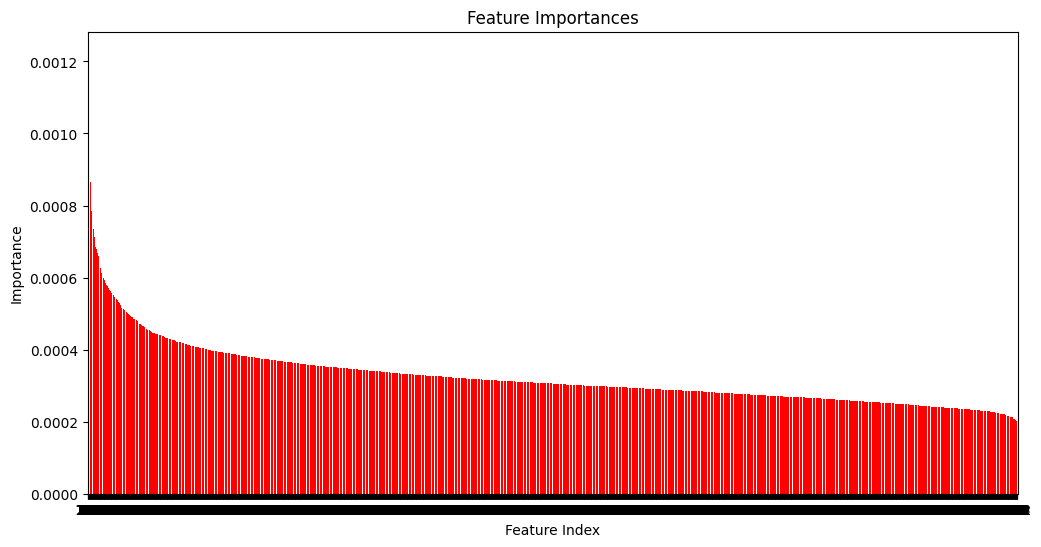

In [7]:
# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(train_images.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(train_images.shape[1]), indices)
plt.xlim([-1, train_images.shape[1]])
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()

In [8]:
import numpy as np

def select_top_k_features(features, importance_scores, k):
    feature_importance = [(features[i], importance_scores[i]) for i in range(len(features))]
    sorted_features = sorted(feature_importance, key=lambda x: x[1], reverse=True)
    top_k_features = sorted_features[:k]
    return top_k_features

# Assuming you have features, importance_scores, and k defined earlier
features = pixel_names  # Assuming pixel_names contains the names of features (pixels)
importance_scores = importances
import random
k = random.randint(100,300)

top_k_features = select_top_k_features(features, importance_scores, k)
print("Top {} Features:".format(k))
for feature_name, importance_value in top_k_features:
    print(f"Feature: {feature_name}, Importance: {importance_value}")


Top 186 Features:
Feature: pixel_89, Importance: 0.0012212883611093254
Feature: pixel_164, Importance: 0.0011913491785347397
Feature: pixel_173, Importance: 0.0011434559899547929
Feature: pixel_23, Importance: 0.00103467235198014
Feature: pixel_83, Importance: 0.0009924963223469955
Feature: pixel_107, Importance: 0.0009906584225251825
Feature: pixel_212, Importance: 0.0009356112223179124
Feature: pixel_161, Importance: 0.0009354492352314131
Feature: pixel_92, Importance: 0.0008682593860114943
Feature: pixel_260, Importance: 0.0008665151041233162
Feature: pixel_995, Importance: 0.0008283985554082184
Feature: pixel_14, Importance: 0.0007954135640144117
Feature: pixel_71, Importance: 0.0007848964626902087
Feature: pixel_59, Importance: 0.0007656026525791047
Feature: pixel_110, Importance: 0.0007628215534298587
Feature: pixel_203, Importance: 0.0007562312135572755
Feature: pixel_119, Importance: 0.0007490587998469962
Feature: pixel_182, Importance: 0.0007439301975613196
Feature: pixel_47, 

In [9]:
feature_names = [feature[0] for feature in top_k_features]
feature_names

['pixel_89',
 'pixel_164',
 'pixel_173',
 'pixel_23',
 'pixel_83',
 'pixel_107',
 'pixel_212',
 'pixel_161',
 'pixel_92',
 'pixel_260',
 'pixel_995',
 'pixel_14',
 'pixel_71',
 'pixel_59',
 'pixel_110',
 'pixel_203',
 'pixel_119',
 'pixel_182',
 'pixel_47',
 'pixel_53',
 'pixel_821',
 'pixel_62',
 'pixel_824',
 'pixel_725',
 'pixel_140',
 'pixel_179',
 'pixel_2534',
 'pixel_719',
 'pixel_188',
 'pixel_1292',
 'pixel_1115',
 'pixel_86',
 'pixel_65',
 'pixel_230',
 'pixel_1019',
 'pixel_2530',
 'pixel_830',
 'pixel_905',
 'pixel_1097',
 'pixel_803',
 'pixel_1586',
 'pixel_263',
 'pixel_911',
 'pixel_2437',
 'pixel_1385',
 'pixel_1202',
 'pixel_1106',
 'pixel_716',
 'pixel_1301',
 'pixel_17',
 'pixel_1394',
 'pixel_1391',
 'pixel_200',
 'pixel_812',
 'pixel_1193',
 'pixel_1388',
 'pixel_1583',
 'pixel_20',
 'pixel_1490',
 'pixel_1487',
 'pixel_1679',
 'pixel_2467',
 'pixel_833',
 'pixel_5',
 'pixel_731',
 'pixel_44',
 'pixel_80',
 'pixel_827',
 'pixel_1580',
 'pixel_722',
 'pixel_707',
 '

In [10]:
feature_values = df_train[feature_names]

# Convert the values into a dictionary
data = feature_values.to_dict(orient='list')

data

{'pixel_89': [0.42352941632270813,
  0.27843138575553894,
  0.9921568632125854,
  0.15294118225574493,
  0.843137264251709,
  0.21960784494876862,
  0.2862745225429535,
  0.1764705926179886,
  0.8705882430076599,
  0.8392156958580017,
  0.19607843458652496,
  0.8274509906768799,
  0.929411768913269,
  0.04313725605607033,
  0.6470588445663452,
  0.9058823585510254,
  0.9254902005195618,
  0.15294118225574493,
  0.800000011920929,
  0.4588235318660736,
  0.48235294222831726,
  0.04313725605607033,
  0.19607843458652496,
  0.16470588743686676,
  0.5843137502670288,
  0.5372549295425415,
  0.4470588266849518,
  0.3176470696926117,
  0.5411764979362488,
  0.7843137383460999,
  0.4156862795352936,
  0.5490196347236633,
  0.16470588743686676,
  0.30588236451148987,
  0.4431372582912445,
  0.572549045085907,
  0.7333333492279053,
  0.5647059082984924,
  0.0117647061124444,
  0.2980392277240753,
  0.22745098173618317,
  0.6666666865348816,
  0.3843137323856354,
  0.8313725590705872,
  0.301960

In [11]:
def add_laplace_noise_to_features(data, epsilon):
    noisy_data = {}
    for feature, values in data.items():
        sensitivity = np.max(values) - np.min(values)
        scale = sensitivity / epsilon
        noise = np.random.laplace(0, scale, len(values))
        noisy_values = values + noise
        noisy_data[feature] = noisy_values
    return noisy_data



epsilon = 0.69
noisy_data = add_laplace_noise_to_features({feature[0]: data[feature[0]] for feature in top_k_features}, epsilon)
noisy_data


{'pixel_89': array([ 1.62821234, -1.90893477, -2.12842496, ...,  0.88904558,
         1.00735392,  0.76476674]),
 'pixel_164': array([ 0.28932529,  0.58661693,  0.0154791 , ...,  2.78662298,
         0.67193079, -0.5414474 ]),
 'pixel_173': array([-0.43801921, -0.2175407 ,  0.31774689, ...,  0.69200911,
        -0.45104545,  0.48942652]),
 'pixel_23': array([ 1.46285281, -1.17757646,  0.95753021, ..., -0.34046932,
         0.96885544,  4.9451692 ]),
 'pixel_83': array([ 2.42682269, -1.80368088,  1.53746246, ...,  2.7709868 ,
         1.70695296,  1.23939828]),
 'pixel_107': array([-2.7166505 , -1.29857952, -0.28047078, ..., -1.33852957,
        -1.25641674,  0.39054231]),
 'pixel_212': array([-1.01333812,  0.87600289,  6.65860332, ...,  1.0136237 ,
        -5.36604231,  1.96738265]),
 'pixel_161': array([ 1.03424089, -0.70762547,  1.84152879, ..., -0.24002501,
         5.43372816,  2.33686685]),
 'pixel_92': array([ 4.09346254, -2.13262784, -0.78638196, ...,  1.52420791,
         0.089

In [12]:
print("Noisy Data for Top {} Features:".format(k))
for feature, values in noisy_data.items():
    print(feature, values)

Noisy Data for Top 186 Features:
pixel_89 [ 1.62821234 -1.90893477 -2.12842496 ...  0.88904558  1.00735392
  0.76476674]
pixel_164 [ 0.28932529  0.58661693  0.0154791  ...  2.78662298  0.67193079
 -0.5414474 ]
pixel_173 [-0.43801921 -0.2175407   0.31774689 ...  0.69200911 -0.45104545
  0.48942652]
pixel_23 [ 1.46285281 -1.17757646  0.95753021 ... -0.34046932  0.96885544
  4.9451692 ]
pixel_83 [ 2.42682269 -1.80368088  1.53746246 ...  2.7709868   1.70695296
  1.23939828]
pixel_107 [-2.7166505  -1.29857952 -0.28047078 ... -1.33852957 -1.25641674
  0.39054231]
pixel_212 [-1.01333812  0.87600289  6.65860332 ...  1.0136237  -5.36604231
  1.96738265]
pixel_161 [ 1.03424089 -0.70762547  1.84152879 ... -0.24002501  5.43372816
  2.33686685]
pixel_92 [ 4.09346254 -2.13262784 -0.78638196 ...  1.52420791  0.08951632
  0.62476475]
pixel_260 [ 0.1825541  -0.19254541  5.02492034 ...  1.14376262 -1.12911631
  1.79948718]
pixel_995 [ 0.29812262 -0.89866651  2.26516603 ...  0.93477078  1.6840171
 -0.867

In [13]:
for feature, values in noisy_data.items():
    df_train[feature] = values

In [14]:
df_train

pixel_0   pixel_1   pixel_2   pixel_3   pixel_4   pixel_5   pixel_6  \
0      0.231373  0.243137  0.247059  0.168627  0.180392 -0.906198  0.196078   
1      0.603922  0.694118  0.733333  0.494118  0.537255  1.578249  0.411765   
2      1.000000  1.000000  1.000000  0.992157  0.992157  0.666788  0.992157   
3      0.109804  0.098039  0.039216  0.145098  0.133333 -2.421189  0.149020   
4      0.666667  0.705882  0.776471  0.658824  0.698039 -0.058833  0.694118   
...         ...       ...       ...       ...       ...       ...       ...   
49995  0.568627  0.631373  0.760784  0.592157  0.650980  0.243789  0.611765   
49996  1.000000  0.960784  0.517647  0.996078  0.968627  3.250372  1.000000   
49997  0.137255  0.698039  0.921569  0.156863  0.690196  2.014835  0.164706   
49998  0.741176  0.827451  0.941176  0.729412  0.815686  2.983739  0.725490   
49999  0.898039  0.898039  0.937255  0.925490  0.929412 -0.369465  0.917647   

        pixel_7   pixel_8   pixel_9  ...  pixel_3063  pixel_3064  pixel_3065  \
0      0.188235  0.168627  0.266667  ...    0.847059    0.721569    0.549020   
1      0.407843  0.372549  0.400000  ...    0.560784    0.521569    0.545098   
2      0.992157  0.992157  0.992157  ...    0.305882    0.333333    0.325490   
3      0.137255  0.078431  0.164706  ...    0.211765    0.184314    0.109804   
4      0.725490  0.796078  0.717647  ...    0.294118    0.309804    0.321569   
...         ...       ...       ...  ...         ...         ...         ...   
49995  0.670588  0.803922  0.607843  ...    0.152941    0.160784    0.219608   
49996  0.976471  0.537255  0.996078  ...    0.976471    0.682353    0.309804   
49997  0.690196  0.945098  0.152941  ...    0.105882    0.203922    0.301961   
49998  0.811765  0.921569  0.721569  ...    0.764706    0.721569    0.662745   
49999  0.925490  0.968627  0.905882  ...    0.701961    0.694118    0.678431   

       pixel_3066  pixel_3067  pixel_3068  pixel_3069  pixel_3070  pixel_3071  \
0        0.592157    0.462745    0.329412    0.482353    0.360784    0.282353   
1        0.560784    0.525490    0.556863    0.560784    0.521569    0.564706   
2        0.309804    0.333333    0.325490    0.313726    0.337255    0.329412   
3        0.247059    0.219608    0.145098    0.282353    0.254902    0.180392   
4        0.278431    0.294118    0.305882    0.286275    0.301961    0.313726   
...           ...         ...         ...         ...         ...         ...   
49995    0.141176    0.149020    0.207843    0.145098    0.152941    0.211765   
49996    0.988235    0.709804    0.317647    0.992157    0.709804    0.298039   
49997    0.082353    0.168627    0.258824    0.047059    0.121569    0.196078   
49998    0.768627    0.741176    0.670588    0.764706    0.745098    0.670588   
49999    0.643137    0.643137    0.635294    0.639216    0.639216    0.631373   

       label  
0          6  
1          9  
2          9  
3          4  
4          1  
...      ...  
49995      2  
49996      6  
49997      9  
49998      1  
49999      1  

[50000 rows x 3073 columns]

In [15]:
df_train['pixel_89']

0        1.628212
1       -1.908935
2       -2.128425
3        0.818536
4        1.354744
           ...   
49995    1.812582
49996    0.451836
49997    0.889046
49998    1.007354
49999    0.764767
Name: pixel_89, Length: 50000, dtype: float64

In [16]:
df_train.drop(columns=['label']).shape

(50000, 3072)

In [17]:
len(train_labels)

50000

In [18]:
len(train_images)

50000

In [19]:
# Assuming df_train and df_test are separate DataFrames containing training and test data, respectively
# Extract image data and labels from training data
train_images = df_train.drop(columns=['label']).values.reshape(-1, 32, 32, 3)
train_labels = df_train['label'].values

# Extract image data and labels from test data
test_images = df_test.drop(columns=['label']).values.reshape(-1, 32, 32, 3)
test_labels = df_test['label'].values

# Make sure training data and labels have the same number of samples
train_images = train_images[:len(train_labels)]

# Define the CNN architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)





Epoch 1/10


1250/1250 [==============================] - 40s 30ms/step - loss: 1.8317 - accuracy: 0.3224 - val_loss: 1.6337 - val_accuracy: 0.4002
Epoch 2/10
1250/1250 [==============================] - 40s 32ms/step - loss: 1.4490 - accuracy: 0.4752 - val_loss: 1.3993 - val_accuracy: 0.4939
Epoch 3/10
1250/1250 [==============================] - 40s 32ms/step - loss: 1.2865 - accuracy: 0.5380 - val_loss: 1.3070 - val_accuracy: 0.5350
Epoch 4/10
1250/1250 [==============================] - 39s 32ms/step - loss: 1.1671 - accuracy: 0.5818 - val_loss: 1.2655 - val_accuracy: 0.5512
Epoch 5/10
1250/1250 [==============================] - 40s 32ms/step - loss: 1.0759 - accuracy: 0.6142 - val_loss: 1.2023 - val_accuracy: 0.5700
Epoch 6/10
1250/1250 [==============================] - 40s 32ms/step - loss: 0.9964 - accuracy: 0.6462 - val_loss: 1.1835 - val_accuracy: 0.5857
Epoch 7/10
1250/1250 [==============================] - 41s 32ms/step - loss: 0.9201 - accuracy: 0.6721 - val_loss: 1.2